<a href="https://colab.research.google.com/github/ClaudiaTurner/Predictive_Analytics/blob/main/Assignment_1_P_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Individuals=pd.read_csv('https://github.com/ClaudiaTurner/Predictive_Analytics/raw/main/DATA/individuals.csv')
Age_Sex=pd.read_csv('https://github.com/ClaudiaTurner/Predictive_Analytics/raw/main/DATA/age_sex.csv')
Individuals.head()

Age_Sex.nlargest(5, 'Fa0_02')

,zone_name,zone_id,Fa0_02,Fa03_04,Fa05_09,Fa10_15,Fa16_19,Fa20_44,Fa45_64,Fa65_74,Fa75_pl,Ma0_02,Ma03_04,Ma05_09,Ma10_15,Ma16_19,Ma20_44,Ma45_64,Ma65_74,Ma75_pl
32399,Sheffield 075G,E01033268,157,5,19,26,128,415,148,72,70,13,6,162,24,151,648,198,77,54
32798,Colchester 015G,E01033723,146,85,144,101,46,717,85,14,6,169,76,164,88,43,648,82,11,5
1689,Hackney 029B,E01001728,144,74,108,80,63,419,129,34,26,127,58,102,84,45,355,125,23,19
16635,Portsmouth 018E,E01017132,138,80,73,55,153,560,158,57,101,78,58,115,79,181,550,159,43,51
14211,Bristol 055B,E01014653,128,56,108,94,63,496,177,50,28,129,73,134,128,83,538,209,56,46


In [ ]:
Individuals.shape

(15533, 19)

In [3]:
# From the individual level dataset (‘individuals.csv’), how many individuals consume more than 5 grams of beef and 10 grams of sausages per day?


# Filter: individuals who consume more than 5g of beef AND more than 10g of sausages
filtered = Individuals[(Individuals['Beef'] > 5) & (Individuals['Sausages'] > 10)]

# Count how many meet the criteria
num_individuals = filtered.shape[0]

# Output the result
print(f"✅ Number of individuals consuming >5g of beef and >10g of sausages per day: {num_individuals}")


✅ Number of individuals consuming >5g of beef and >10g of sausages per day: 2997


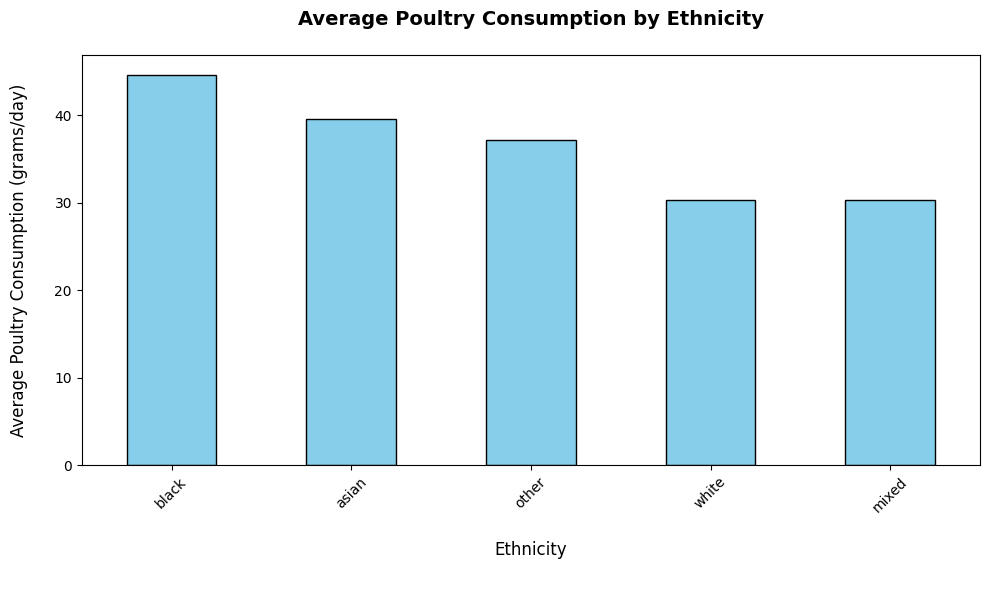

In [ ]:
# Q1.3 Poultry consumption
# 8 Points
# Grading comment:
# Using the individual level dataset (‘individuals.csv’), create a bar chart showing average poultry consumption for each ethnicity category. Export as a JPEG image and upload.

# 2. Group by 'ethnicity' and calculate the mean poultry consumption
ethnicity_poultry = Individuals.groupby('Ethnicity')['Poultry'].mean().sort_values(ascending=False)

# 3. Plot the bar chart
plt.figure(figsize=(10, 6))
ethnicity_poultry.plot(kind='bar', color='skyblue', edgecolor='black')

# 4. Add labels and title
plt.title("Average Poultry Consumption by Ethnicity\n", fontsize=14, fontweight='bold')
plt.xlabel("\nEthnicity\n", fontsize=12)
plt.ylabel("Average Poultry Consumption (grams/day)\n", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 5. Save as JPEG
plt.savefig("poultry_by_ethnicity.jpg", format='jpeg', dpi=300)

# 6. Show plot (optional, for review)

plt.savefig('Average_Poultry.png')

plt.show()

In [ ]:
Age_Sex.columns

Index(['zone_name', 'zone_id', 'Fa0_02', 'Fa03_04', 'Fa05_09', 'Fa10_15',
       'Fa16_19', 'Fa20_44', 'Fa45_64', 'Fa65_74', 'Fa75_pl', 'Ma0_02',
       'Ma03_04', 'Ma05_09', 'Ma10_15', 'Ma16_19', 'Ma20_44', 'Ma45_64',
       'Ma65_74', 'Ma75_pl'],
      dtype='object')

In [4]:
# Find zone with most female and male 0–2 year-olds combined
Age_Sex['Total_0_2'] = Age_Sex['Fa0_02'] + Age_Sex['Ma0_02']
highest_babies_zone = Age_Sex.sort_values('Total_0_2', ascending=False).head(1)
print(highest_babies_zone[['zone_name', 'zone_id', 'Total_0_2']])

             zone_name    zone_id  Total_0_2
32798  Colchester 015G  E01033723        315


In [8]:
# 1. Define mapping for renaming
rename_dict = {
    'Fa0_02': 'Fem 0-2', 'Ma0_02': 'Male 0-2',
    'Fa03_04': 'Fem 3-4', 'Ma03_04': 'Male 3-4',
    'Fa05_09': 'Fem 5-9', 'Ma05_09': 'Male 5-9',
    'Fa10_15': 'Fem 10-15', 'Ma10_15': 'Male 10-15',
    'Fa16_19': 'Fem 16-19', 'Ma16_19': 'Male 16-19',
    'Fa20_44': 'Fem 20-44', 'Ma20_44': 'Male 20-44',
    'Fa45_64': 'Fem 45-64', 'Ma45_64': 'Male 45-64',
    'Fa65_74': 'Fem 65-74', 'Ma65_74': 'Male 65-74',
    'Fa75_pl': 'Fem 75+', 'Ma75_pl': 'Male 75+'
}

# 2. Rename the columns
Age_Sex.rename(columns=rename_dict, inplace=True)

# 3. Desired column order
ordered_columns = [
    'Fem 0-2', 'Male 0-2',
    'Fem 3-4', 'Male 3-4',
    'Fem 5-9', 'Male 5-9',
    'Fem 10-15', 'Male 10-15',
    'Fem 16-19', 'Male 16-19',
    'Fem 20-44', 'Male 20-44',
    'Fem 45-64', 'Male 45-64',
    'Fem 65-74', 'Male 65-74',
    'Fem 75+', 'Male 75+'
]

# 4. Reorder columns, keeping ID columns first
id_cols = ['zone_id', 'zone_name']
Age_Sex = Age_Sex[id_cols + ordered_columns]

In [9]:
Age_Sex

,zone_id,zone_name,Fem 0-2,Male 0-2,Fem 3-4,Male 3-4,Fem 5-9,Male 5-9,Fem 10-15,Male 10-15,Fem 16-19,Male 16-19,Fem 20-44,Male 20-44,Fem 45-64,Male 45-64,Fem 65-74,Male 65-74,Fem 75+,Male 75+
0,E01000001,City of London 001A,18,11,10,11,19,14,16,16,7,6,266,316,222,265,68,71,72,57
1,E01000002,City of London 001B,29,17,10,4,29,17,21,16,12,9,238,287,216,262,75,97,39,58
2,E01000003,City of London 001C,23,15,8,7,9,13,12,17,27,40,244,339,157,181,55,59,97,43
3,E01000005,City of London 001E,17,6,12,7,22,38,32,30,17,18,200,231,98,130,31,48,28,20
4,E01000006,Barking and Dagenham 016A,56,52,25,21,65,57,56,62,31,34,392,421,146,152,31,44,35,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,W01001954,Cardiff 006F,18,13,13,11,34,49,67,59,38,41,144,160,260,262,93,78,120,77
34749,W01001955,Swansea 025F,12,8,5,2,1,4,6,2,45,40,242,534,131,228,66,69,105,55
34750,W01001956,Swansea 023E,24,20,19,22,37,34,50,60,449,515,372,418,268,270,113,83,97,70
34751,W01001957,Swansea 025G,4,9,5,7,18,18,16,25,14,26,149,392,83,124,44,38,34,30


In [6]:
Age_Sex

,zone_name,zone_id,Fa0_02,Fa03_04,Fa05_09,Fa10_15,Fa16_19,Fa20_44,Fa45_64,Fa65_74,...,Ma0_02,Ma03_04,Ma05_09,Ma10_15,Ma16_19,Ma20_44,Ma45_64,Ma65_74,Ma75_pl,Total_0_2
0,City of London 001A,E01000001,18,10,19,16,7,266,222,68,...,11,11,14,16,6,316,265,71,57,29
1,City of London 001B,E01000002,29,10,29,21,12,238,216,75,...,17,4,17,16,9,287,262,97,58,46
2,City of London 001C,E01000003,23,8,9,12,27,244,157,55,...,15,7,13,17,40,339,181,59,43,38
3,City of London 001E,E01000005,17,12,22,32,17,200,98,31,...,6,7,38,30,18,231,130,48,20,23
4,Barking and Dagenham 016A,E01000006,56,25,65,56,31,392,146,31,...,52,21,57,62,34,421,152,44,23,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,Cardiff 006F,W01001954,18,13,34,67,38,144,260,93,...,13,11,49,59,41,160,262,78,77,31
34749,Swansea 025F,W01001955,12,5,1,6,45,242,131,66,...,8,2,4,2,40,534,228,69,55,20
34750,Swansea 023E,W01001956,24,19,37,50,449,372,268,113,...,20,22,34,60,515,418,270,83,70,44
34751,Swansea 025G,W01001957,4,5,18,16,14,149,83,44,...,9,7,18,25,26,392,124,38,30,13


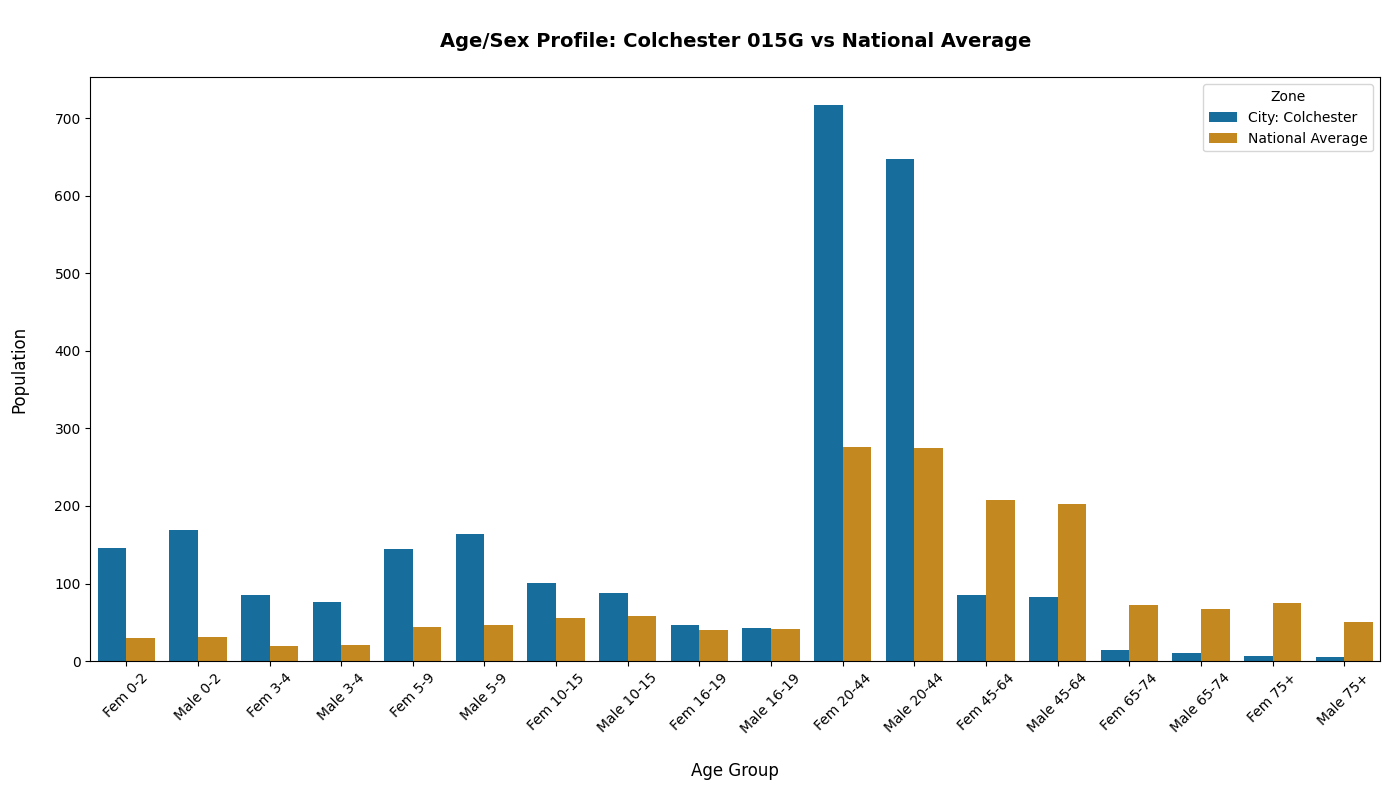

In [15]:
# Q1.4 Age profile chart
# 15 Points
# Grading comment:
# Use the 'age_sex.csv' file for this question.

# For a geographical zone of your choice, create a bar chart to show how the age/sex profile compares to the population as a whole.

# a) State the code of the geographical zone you chose

import seaborn as sns


# 2. Filter Oxford 008A (specific zone)
oxford = Age_Sex[Age_Sex['zone_id'] == 'E01033723']

# 3. Calculate national average (across all zones)
national_avg = Age_Sex.drop(columns=['zone_name', 'zone_id']).mean().to_frame(name='National_Average').T

# 4. Reshape Oxford and national data from wide to long
oxford_long = oxford.drop(columns=['zone_name', 'zone_id']).melt(var_name='Age_Sex', value_name='City: Colchester')
national_long = national_avg.melt(var_name='Age_Sex', value_name='National Average')

# 5. Merge both long DataFrames for comparison
combined = pd.merge(oxford_long, national_long, on='Age_Sex')

# 6. Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=combined.melt(id_vars='Age_Sex', var_name='Zone', value_name='Population'),
            x='Age_Sex', y='Population', hue='Zone', palette='colorblind')

# 7. Customizations
plt.title("\nAge/Sex Profile: Colchester 015G vs National Average\n", fontsize=14, fontweight='bold')
plt.xlabel("\nAge Group", fontsize=12)
plt.ylabel("Population\n", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('Colchester_England_Q1.4.png')

plt.show()

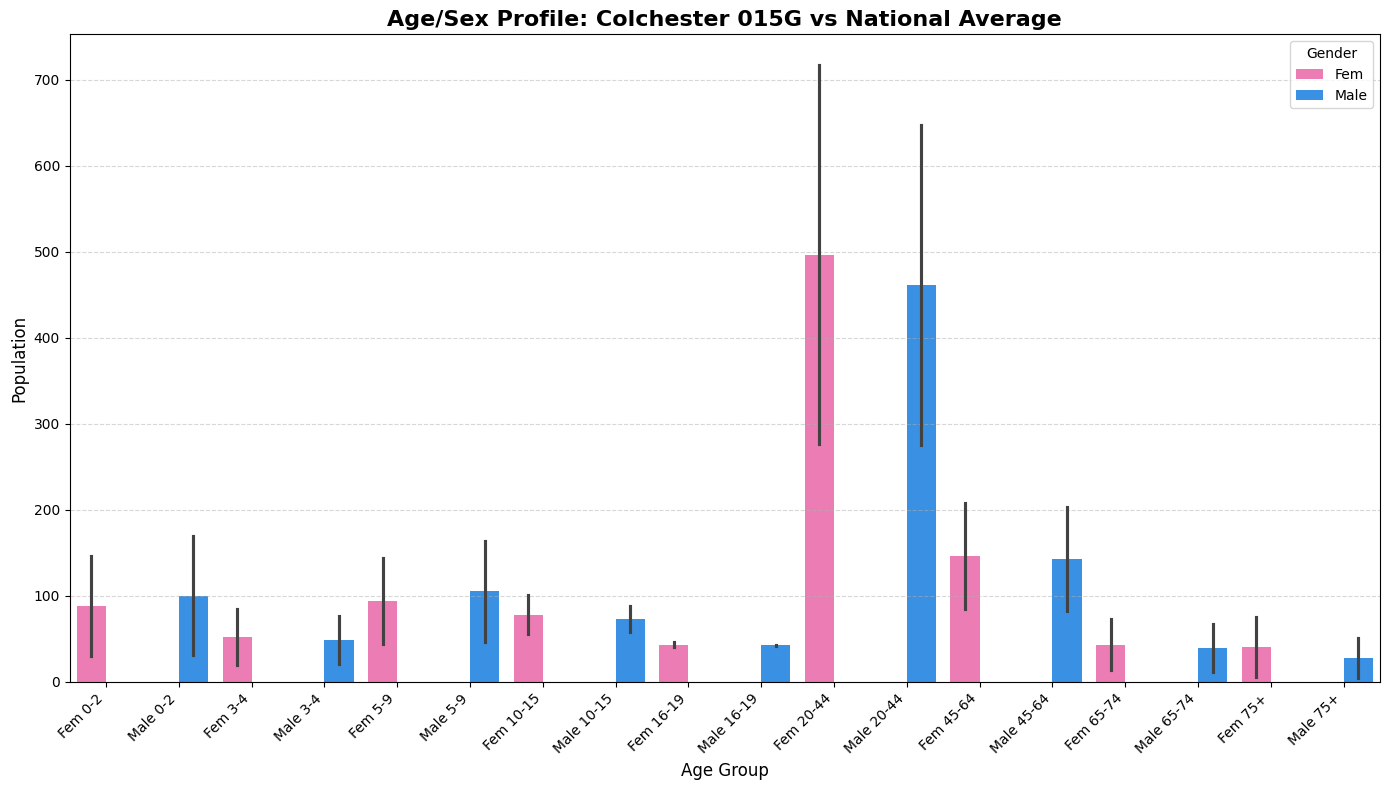

In [16]:


# Filter zone E01033723 (Colchester 015G)
colchester = Age_Sex[Age_Sex['zone_id'] == 'E01033723']

# National average (exclude zone_id and zone_name)
national_avg = Age_Sex.drop(columns=['zone_id', 'zone_name']).mean().to_frame(name='National').T

# Reshape both to long format
colchester_long = colchester.drop(columns=['zone_id', 'zone_name']).melt(var_name='Age_Sex', value_name='Colchester')
national_long = national_avg.melt(var_name='Age_Sex', value_name='National')

# Merge on Age_Sex
combined = pd.merge(colchester_long, national_long, on='Age_Sex')

# Extract gender for color grouping
combined['Gender'] = combined['Age_Sex'].str.split().str[0]

# Melt for seaborn barplot
melted = combined.melt(id_vars=['Age_Sex', 'Gender'], value_vars=['Colchester', 'National'],
                       var_name='Zone', value_name='Population')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=melted,
    x='Age_Sex', y='Population',
    hue='Gender',
    palette={'Fem': '#FF69B4', 'Male': '#1E90FF'},
    dodge=True
)

plt.title("Age/Sex Profile: Colchester 015G vs National Average", fontsize=16, weight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Colchester_vs_National_gender_colors.png")
plt.show()

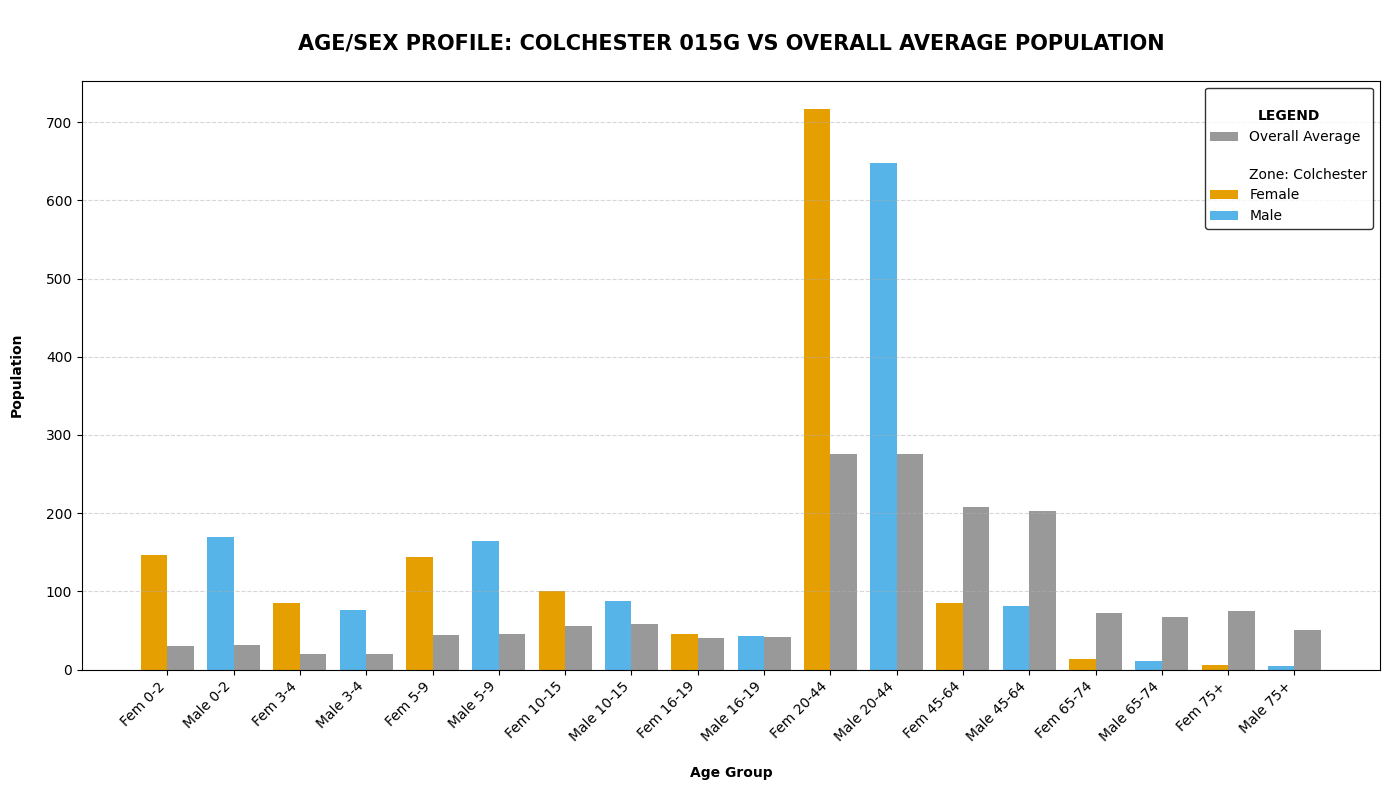

In [57]:

# Prepare Colchester and National data
colchester = Age_Sex[Age_Sex['zone_id'] == 'E01033723']
national_avg = Age_Sex.drop(columns=['zone_id', 'zone_name']).mean().to_frame(name='National').T

# Melt
colchester_long = colchester.drop(columns=['zone_id', 'zone_name']).melt(var_name='Age_Sex', value_name='Population')
colchester_long['Zone'] = 'Colchester'
colchester_long['Gender'] = colchester_long['Age_Sex'].str.split().str[0]

national_long = national_avg.melt(var_name='Age_Sex', value_name='Population')
national_long['Zone'] = 'National'
national_long['Gender'] = national_long['Age_Sex'].str.split().str[0]

# Combine
combined = pd.concat([colchester_long, national_long], ignore_index=True)

# Age group ordering
age_order = [
    'Fem 0-2', 'Male 0-2', 'Fem 3-4', 'Male 3-4', 'Fem 5-9', 'Male 5-9',
    'Fem 10-15', 'Male 10-15', 'Fem 16-19', 'Male 16-19',
    'Fem 20-44', 'Male 20-44', 'Fem 45-64', 'Male 45-64',
    'Fem 65-74', 'Male 65-74', 'Fem 75+', 'Male 75+'
]
combined['Age_Sex'] = pd.Categorical(combined['Age_Sex'], categories=age_order, ordered=True)
combined.sort_values('Age_Sex', inplace=True)

# Color mapping
def color_mapper(row):
    if row['Zone'] == 'National':
        return '#999999'  # gray
    return '#E69F00' if row['Gender'] == 'Fem' else '#56B4E9'  # orange/blue

combined['Color'] = combined.apply(color_mapper, axis=1)

# Plot
plt.figure(figsize=(14, 8))
bar_width = 0.4
x = range(len(age_order))

# Colchester bars
colchester_data = combined[combined['Zone'] == 'Colchester']
for i, (_, row) in enumerate(colchester_data.iterrows()):
    plt.bar(x[i] - bar_width/2, row['Population'], width=bar_width, color=row['Color'])

# National bars
national_data = combined[combined['Zone'] == 'National']
for i, (_, row) in enumerate(national_data.iterrows()):
    plt.bar(x[i] + bar_width/2, row['Population'], width=bar_width, color=row['Color'])

# Labels and layout
plt.xticks(ticks=x, labels=age_order, rotation=45, ha='right')
plt.xlabel("\nAge Group").set_fontweight('bold')
plt.ylabel("Population\n").set_fontweight('bold')
plt.title("\nAGE/SEX PROFILE: COLCHESTER 015G VS OVERALL AVERAGE POPULATION\n", fontsize=15, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
from matplotlib.patches import Patch


# 1. Define legend entries
legend_elements = [
    Patch(facecolor='#999999', label='Overall Average'),
    Patch(facecolor='none', edgecolor='none', label='\nZone: Colchester'),  # Section title
    Patch(facecolor='#E69F00', label='Female'),
    Patch(facecolor='#56B4E9', label='Male')
]

# 2. Apply legend with default placement
legend = plt.legend(
    handles=legend_elements,
    title='\nLEGEND',
    frameon=True,
    edgecolor='black',  # Border color
)

# 3. Format the legend title
legend.get_title().set_fontweight('bold')
legend.get_title().set_horizontalalignment('center')  # Center the title text
legend.get_title().set_fontsize('medium')  # Optional: make it stand out


plt.tight_layout()
plt.savefig("Ages_Sex_Profile_Barplot_Q1.4.png")

plt.show()